# **Data Preprocessing**
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1nAFpPUXf1UI76ZsGqArxJCmHdgSjoKb7?usp=sharing)


# **Get into Root Folder**

The dataset is stored on root > dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
GIT_FOLDER_NAME = 'Kaggle-ML/Neuromatch_Project'
GIT_FOLDER_PATH = f'drive/My Drive/{GIT_FOLDER_NAME}/'
%cd "{GIT_FOLDER_PATH}"



This variable must point to the root folder of the dataset

In [10]:
DATASET_ROOT = 'dataset'
TRAIN_FOLDER = f'{DATASET_ROOT}/Training'
TEST_FOLDER = f'{DATASET_ROOT}/Testing'

# **Basic EDA**

#### **Setting up config**

**Importing libraries to be used in this section:**

In [49]:
import matplotlib.pyplot as plt 
import matplotlib.image as img
import pandas as pd
import PIL.Image as Image 
import numpy as np
import cv2 
import random
import os

**View sample image**


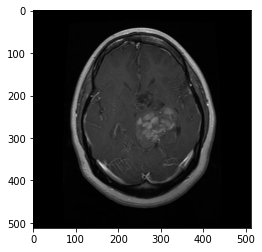

In [66]:
%matplotlib inline
rgb_list = []
sample_image = img.imread(f'{DATASET_ROOT}/Training/glioma_tumor/gg (1).jpg')
plt.imshow(sample_image)

**What is the shape / resolution of the pictures?**

In [68]:
sample_image.shape

(512, 512, 3)

**Listing images in train and test sets.**

`train_images` and `tests_images` are array that follow this structure: `[path to image, folder(class)]`

In [35]:
train_images = []
for folder in os.listdir(TRAIN_FOLDER):
  for image in os.listdir(TRAIN_FOLDER + '/' + folder):
    train_images.append([os.path.join(TRAIN_FOLDER, folder, image),folder])

In [ ]:
train_images

In [42]:
test_images = []
for folder in os.listdir(TEST_FOLDER):
  for image in os.listdir(TEST_FOLDER + '/' + folder):
    test_images.append([os.path.join(TRAIN_FOLDER, folder, image),folder])

In [ ]:
test_images

**View random array of images**


In [44]:
def display_random_images(images):
  plt.figure(1, figsize=(15, 9))
  plt.axis('off')
  n = 0
  for i in range(16):
    n += 1
    random_img = random.choice(images)
    imgs = img.imread(random_img[0])
    plt.subplot(4, 4, n)
    plt.imshow(imgs)

  plt.show()

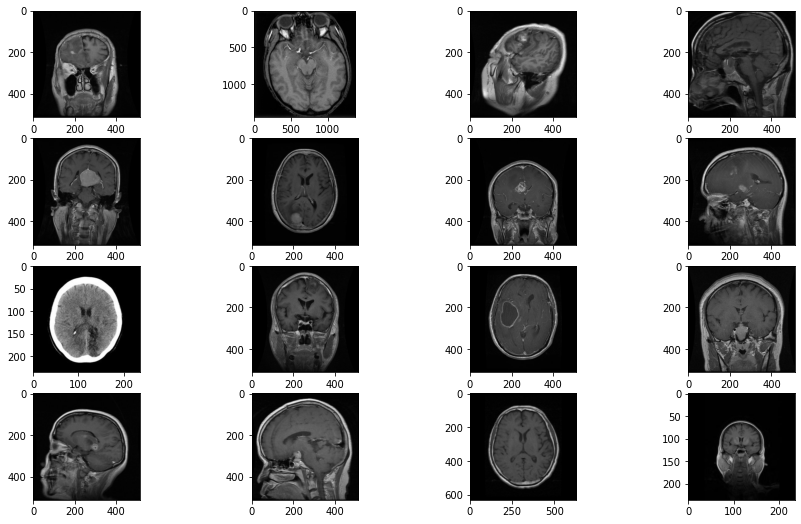

In [41]:
display_random_images(train_images)

Convert arrays to dataframes


In [53]:
# Converting to np arrays
train_images = np.array(train_images)
test_images = np.array(test_images)

# Converting to dataframes
train_df = pd.DataFrame(train_images, columns = ['Path','Class'])
test_df = pd.DataFrame(test_images, columns = ['Path','Class'])

In [55]:
train_df.head()

,Path,Class
0,dataset/Training/glioma_tumor/gg (581).jpg,glioma_tumor
1,dataset/Training/glioma_tumor/gg (438).jpg,glioma_tumor
2,dataset/Training/glioma_tumor/gg (201).jpg,glioma_tumor
3,dataset/Training/glioma_tumor/gg (136).jpg,glioma_tumor
4,dataset/Training/glioma_tumor/gg (569).jpg,glioma_tumor


How many samples does the training set have?

In [60]:
train_df.count()

Path     2870
Class    2870
dtype: int64

How many samples does the test set have?

In [61]:
test_df.count()

Path     394
Class    394
dtype: int64

How many images does the dataset have of each class? What is the distribution of training and test set?

In [58]:
train_dis = train_df['Class'].value_counts()
train_dis

pituitary_tumor     827
glioma_tumor        826
meningioma_tumor    822
no_tumor            395
Name: Class, dtype: int64

<BarContainer object of 4 artists>

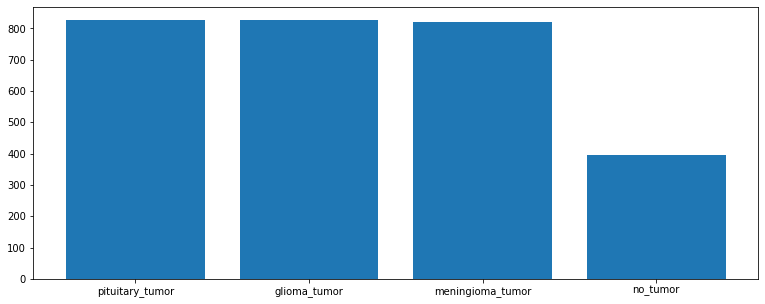

In [62]:
plt.figure(figsize=(13,5))
plt.xticks(np.arange(43))
plt.bar(train_dis.index, train_dis.values)

In [59]:
test_dis = test_df['Class'].value_counts()
test_dis

meningioma_tumor    115
no_tumor            105
glioma_tumor        100
pituitary_tumor      74
Name: Class, dtype: int64

<BarContainer object of 4 artists>

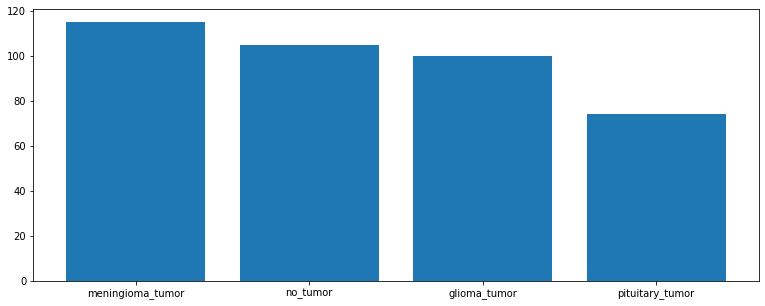

In [63]:
plt.figure(figsize=(13,5))
plt.xticks(np.arange(43))
plt.bar(test_dis.index, test_dis.values)

# **Dataloaders, Splitting sets and Applying Torch Transforms**

This is not working properly

Creating imports of this section

In [91]:
import torch
import pathlib


import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

In [92]:
# Data Augmentation using transforms
train_transforms = transforms.Compose([
                                     transforms.RandomHorizontalFlip(p=0.1),
                                     transforms.RandomVerticalFlip(p=0.1),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5),
                                                          (0.5, 0.5, 0.5))
                                     ])

data_path = pathlib.Path('.')/'afhq'  # Using pathlib to be compatible with all OS's
train_ds = ImageFolder(TRAIN_FOLDER, transform=train_transforms)

In [ ]:
# # the training transforms
# train_transform = transforms.Compose([
#     transforms.Resize(224),
#     transforms.RandomHorizontalFlip(p=0.5),
#     transforms.RandomVerticalFlip(p=0.5),
#     transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
#     transforms.RandomRotation(degrees=(30, 70)),
#     transforms.ToTensor(),
#     transforms.Normalize(
#         mean=[0.5, 0.5, 0.5],
#         std=[0.5, 0.5, 0.5]
#     )
# ])
# # the validation transforms
# valid_transform = transforms.Compose([
#     transforms.Resize(224),
#     transforms.ToTensor(),
#     transforms.Normalize(
#         mean=[0.5, 0.5, 0.5],
#         std=[0.5, 0.5, 0.5]
#     )
# ])

In [ ]:
# TODO: Splitting training dataset 
# Example:
# new_train_data, _,_ = torch.utils.data.random_split(img_dataset,
#                                                     [250, 100, 14280])

In [93]:
BATCH_SIZE=4
NUM_WORKERS=1

train_dataloader = DataLoader(
    train_ds, batch_size=BATCH_SIZE, shuffle=True,
    num_workers=NUM_WORKERS, pin_memory=True
)

In [94]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
img = img.reshape(1,2,0)
plt.imshow(img)
plt.show()
print(f"Label: {label}")

RuntimeError: ignored

# **Data Preprocessing**

# **Data Augmentation**

# **Credits**
- Displaying images: Radhika's Notebook https://github.com/radhikasethi2011/Neuromatch_Fila/blob/main/colab/visualing.ipynb
- Brain Tumor Classification (MRI) Dataset:https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri